In [16]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [25]:
health_df = pd.read_csv("/content/sample_data/data_train_model.csv")

In [18]:
pd.value_counts(health_df.HealthStatus)

5    20999
4    20999
3    20999
2    20999
1    20999
Name: HealthStatus, dtype: int64

In [19]:
print(health_df.info())
pd.set_option('display.max_columns', None)
print(health_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104995 entries, 0 to 104994
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Age           104995 non-null  int64  
 1   Calories      104995 non-null  float64
 2   CaloriesMets  104995 non-null  float64
 3   Steps         104995 non-null  int64  
 4   Distance      104995 non-null  float64
 5   Floors        104995 non-null  int64  
 6   Elevation     104995 non-null  int64  
 7   HeartRate     104995 non-null  int64  
 8   SleepScore    104995 non-null  int64  
 9   HealthStatus  104995 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 8.0 MB
None
   Age     Calories  CaloriesMets  Steps  Distance  Floors  Elevation  \
0   22  2738.407750     25.590602   8258  5.550690       7          9   
1   23  1787.719174      0.000000  11423  6.898088       9          2   
2   23  2782.306870      0.000000   9300  3.305900       0         12   
3   26  2972.9

In [20]:
health_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,104995.0,35.008581,8.753423,20.0,28.000000,35.000000,42.000000,50.000000
Calories,104995.0,1665.560248,802.118487,0.0,1073.750773,1664.600898,2225.232864,3599.815657
CaloriesMets,104995.0,10.573062,9.736079,0.0,0.000000,9.046445,18.962557,33.476488
Steps,104995.0,6031.956607,2624.915328,1000.0,3931.000000,5789.000000,8172.500000,12000.000000
Distance,104995.0,4.949676,3.220573,0.0,2.318819,4.864425,7.413330,12.997188
Floors,104995.0,4.520511,4.002414,0.0,0.000000,4.000000,8.000000,14.000000
Elevation,104995.0,4.229630,3.301637,0.0,1.000000,4.000000,7.000000,12.000000
HeartRate,104995.0,76.995847,7.245244,60.0,72.000000,77.000000,83.000000,90.000000
SleepScore,104995.0,79.502395,15.102064,45.0,69.000000,80.000000,92.000000,100.000000
HealthStatus,104995.0,3.000000,1.414220,1.0,2.000000,3.000000,4.000000,5.000000


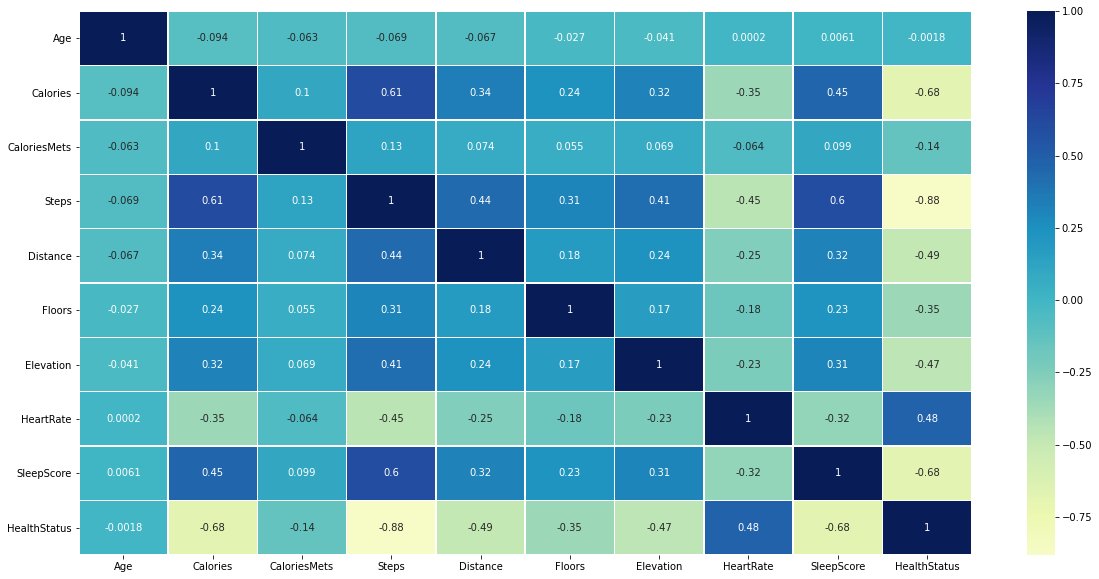

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(health_df.corr(),annot=True,linewidths=.5,center=0,cbar=True,cmap="YlGnBu")
plt.show()

In [26]:
corr_df = health_df.corr()

In [27]:
corr_df[((corr_df > 0.3) & (corr_df < 1))| (corr_df < -0.3)].dropna(how='all')

,Age,Calories,CaloriesMets,Steps,Distance,Floors,Elevation,HeartRate,SleepScore,HealthStatus
Calories,NaN,NaN,NaN,0.610877,0.338978,NaN,0.323697,-0.348609,0.449668,-0.675613
Steps,NaN,0.610877,NaN,NaN,0.436686,0.308978,0.414951,-0.454922,0.595543,-0.880816
Distance,NaN,0.338978,NaN,0.436686,NaN,NaN,NaN,NaN,0.323747,-0.490282
Floors,NaN,NaN,NaN,0.308978,NaN,NaN,NaN,NaN,NaN,-0.347890
Elevation,NaN,0.323697,NaN,0.414951,NaN,NaN,NaN,NaN,0.308261,-0.465837
HeartRate,NaN,-0.348609,NaN,-0.454922,NaN,NaN,NaN,NaN,-0.315695,0.484934
SleepScore,NaN,0.449668,NaN,0.595543,0.323747,NaN,0.308261,-0.315695,NaN,-0.681295
HealthStatus,NaN,-0.675613,NaN,-0.880816,-0.490282,-0.347890,-0.465837,0.484934,-0.681295,NaN


In [24]:
health_df = health_df.drop(['Age','CaloriesMets','Floors'],axis=1)

Model Building for DTC

In [28]:
X_train, X_test, y_train, y_test =train_test_split(health_df.drop(['HealthStatus'],axis=1), health_df['HealthStatus'], test_size=.25,
                                                   random_state=22)
X_train.shape,X_test.shape

((78746, 9), (26249, 9))

In [29]:
dtc = DecisionTreeClassifier()

In [30]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
dtc_acc_train = dtc.score(X_train,y_train)
print("Decision Tree Training accuracy",dtc_acc_train)  

dtc_acc_test = dtc.score(X_test, y_test)
print("Decision Tree  Testing accuracy",dtc_acc_test)

Decision Tree Training accuracy 1.0
Decision Tree  Testing accuracy 0.7645243628328698


Model Building for RFC

In [32]:
rfc = RandomForestClassifier()

In [33]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
rfc_acc_train = rfc.score(X_train,y_train)
print("Random Forest Training accuracy",rfc_acc_train)

Random Forest Training accuracy 1.0


In [35]:
rfc_pred = rfc.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, rfc_pred)
#ideal value is 1. So close enough.

0.878735512286639

In [42]:
from sklearn import metrics
mae_rfc = (metrics.mean_absolute_error(y_test, rfc_pred))
mse_rfc = (metrics.mean_squared_error(y_test, rfc_pred))

print("Mean Absolute Error : ",mae_rfc)
print("Mean Sqaured Error : ",mse_rfc)

Mean Absolute Error :  0.21840832031696444
Mean Sqaured Error :  0.2423330412587146


In [44]:
import numpy as np

def mean_absolute_percentage_error(y_test, rfc_pred): 
    y_test, y_pred = np.array(y_test), np.array(rfc_pred)
    return np.mean(np.abs((y_test - rfc_pred) / y_test)) * 100

mean_absolute_percentage_error(y_test,rfc_pred)
# Good if below 10%
# this mean the prediction is off by 8.17% from the actual value. 
# So if the Health Score is 3. The predicted score is 2.7558. 
# Which when rounded is 3. So pretty accurate, but could be closer.

# Mean Absolute Error of 0.21 mean the score is off by 
# plus or minus 0.21. So if actual score is 3. It is either 3.218 
# or 2.782.

8.171549392357804

In [47]:
rfc_pred_score = (rfc.score(X_test,y_test))
rfc_pred_score
# This is the overall prediction score. Which can vary drastically based on each run.

0.7935540401539106

In [71]:
import sklearn.metrics as skm
cm = skm.multilabel_confusion_matrix(y_test,rfc_pred)
print(cm)
print(skm.classification_report(y_test,rfc_pred))

[[[20496   507]
  [  472  4774]]

 [[20001   948]
  [  984  4316]]

 [[19893  1099]
  [ 1514  3743]]

 [[19587  1458]
  [ 1773  3431]]

 [[19600  1407]
  [  676  4566]]]
              precision    recall  f1-score   support

           1       0.90      0.91      0.91      5246
           2       0.82      0.81      0.82      5300
           3       0.77      0.71      0.74      5257
           4       0.70      0.66      0.68      5204
           5       0.76      0.87      0.81      5242

    accuracy                           0.79     26249
   macro avg       0.79      0.79      0.79     26249
weighted avg       0.79      0.79      0.79     26249



From the confusion matrix, we can see that the model is good at predicting score of realtively health users. but when it comes to unhealthy users. it isn't that great. Further tuning can be done to help predict user health score of 4 or 5.

In [ ]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
gridF = GridSearchCV(rfc,random_grid,cv=2,verbose=1,n_jobs=-1)

In [ ]:
bestF = gridF.fit(X_train,y_train)

In [ ]:
opt = RandomForestClassifier(random_state=1,max_depth=30,n_estimators=500,min_samples_split=2,min_samples_leaf=2)

In [ ]:
modelopt = opt.fit(X_train,y_train)

In [ ]:
y_pred = modelopt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7952525252525252